## Website Landing Page EDA, Statistical Analysis and Conversion Prediction

### Description of data  
Source Dataset: https://github.com/jainds/eda-for-conversion-rate-dataset/tree/master  

- "conversion_data" - information about signed-in users during one session. Each row is a user session.
- *country* : user country based on the IP address
- *age* : user age. Self-reported at sign-in step
- *new_user* : whether the user created the account during this session or had already an account and simply came back to the site
- *source* : marketing channel source
    - *Ads*: came to the site by clicking on an advertisement
    - *Seo*: came to the site by clicking on search results
    - *Direct*: came to the site by directly typing the URL on the browser
- *total_pages_visited*: number of total pages visited during the session (proxy for time spent on site and engagement during the session).
- *converted*: this is our label. 1 means they converted within the session, 0 means they left without buying anything.

### Objective
- Conduct an Exploratory Data Analysis (Data cleaning & prep, Uni/Bivariate Analysis, Conversion Rate Analysis)
- Statistical Testing to assess variables impacting Conversion Rate, Relationships among Variables 
- A/B Testing to assess impact of change in Landing Page (using artifically generated experiment vs. control group data)
- Development of an ML Classification model to predict Conversion of User, achieving at least 85% F1 Score.


### Initiation

In [17]:
# Import libraries

# Basic Data Imports
import numpy as np
import pandas as pd
import datetime as dt 

# Imports for visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Import dataset

df_original= pd.read_csv('conversion_data.csv')
df_original.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


- Total 316,200 records, none of the columns have null values.
- No changes needed in data type.

In [6]:
df_original.describe(include= 'all')

,country,age,new_user,source,total_pages_visited,converted
count,316200,316200.000000,316200.000000,316200,316200.000000,316200.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,178092,NaN,NaN,155040,NaN,NaN
mean,NaN,30.569858,0.685465,NaN,4.872966,0.032258
std,NaN,8.271802,0.464331,NaN,3.341104,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


Initial Observations:
- Our dataset is derived from 4 countries, with most of the data being from US (more than 50%).
- Average age of visitors is ~ 31 years. Maximum age is 123 years, which looks like an outlier. Will check for outlying values.
- *new_user* being 1 implies they created an account when they visited the website in that instance. Average value of 0.68 indicates generally we might have more new users than old users.
- We have 3 channels identified as source (already defined in data description). ~50% of the visitors are coming from search results, and are in majority.
- Average page visits by users = 4.87. Maximum page visits by a user in a session is 29.
- *converted* would imply sale/conversion in that particular record/session. Average value of 0.0322 implies about 3.22% aggregate conversion rate. 


### Exploratory Data Analysis (EDA)
We'll follow the workflow below:
- Data Cleaning & Preparation, Check for missing values, duplicates and outliers.
- *Univariate Analysis*: 
    - Examine distributions of numerical variables (histograms for age, pages visited, etc.).
    - Review frequency counts for categorical variables (country, acquisition channel).
- *Bivariate Analysis*:
    - Use correlation matrices for numeric features (Age/Pages visited).
    - Country/Age, New User, Source, Mktg. Channel, Page visits
    - Age/New User, Source, Page Visits
    - New User/Source, Page visits
    - Source/Page Visits 
- *Deriving Conversion Rate*:
    - Calculate Agg. Conversion Rate (No. of Conversions/Total Sessions)
    - *Segmented rates*: conversion rates by category (e.g., by country, device type).

#### Data Cleaning

In [12]:
# Already checked in DF info that we don't have null values.
# Checking for duplicates

df_original.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


As the variables contain information about the demographic, marketing channel and general stats, there are likely to be duplications, considering we don't have any Personal Information to differentiate user session by any identity or specific location/time etc.  

Hence in this case, we will not be removing any duplicate records. We have already reviewed under the dataframe info that none of the columns have missing values.

In [15]:
df_original.isna().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

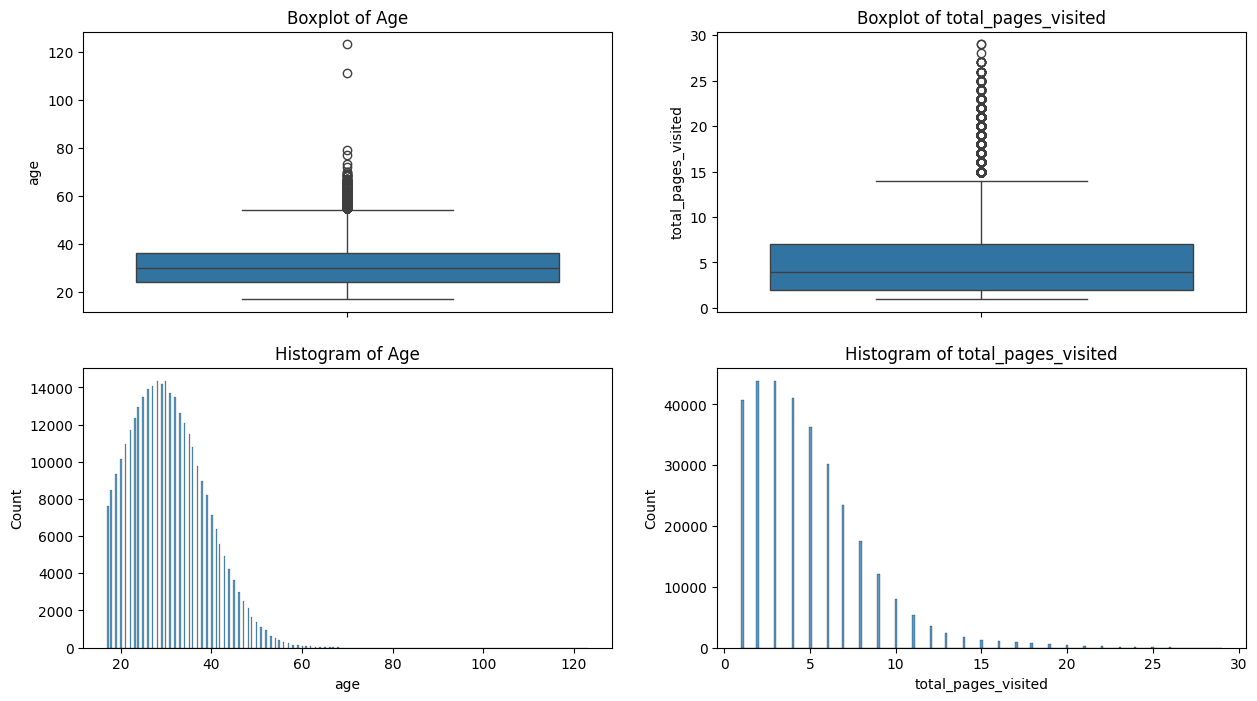

In [29]:
# Plotting boxplot and histogram to assess outliers in continuous variables age and total_pages_visited 
fig, axes = plt.subplots(2,2, figsize= (15,8))
ax1= sns.boxplot(df_original['age'],ax= axes[0,0])
ax1.set_title('Boxplot of Age')

ax2= sns.boxplot(df_original['total_pages_visited'],ax= axes[0,1])
ax2.set_title('Boxplot of total_pages_visited')

ax3= sns.histplot(df_original['age'],ax= axes[1,0])
ax3.set_title('Histogram of Age')

ax4= sns.histplot(df_original['total_pages_visited'],ax= axes[1,1])
ax4.set_title('Histogram of total_pages_visited')

plt.show()

- Age is heavily skewed to the right with quite extreme outliers. We also have values greater than 100, which we'll look into. Outliers might need to be dealt with for some modeling uses.
- Count of pages visited is less skewed and there are some outlying values.

In [ ]:
df_original[df_original['age'] >100]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [33]:
df_original.sort_values(by= ['age'], ascending= False).head()

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1
265167,US,79,1,Direct,1,0
192644,US,77,0,Direct,4,0
154217,US,73,1,Seo,5,0


There are 2 sessions, wherein the visitor age is above 100, which seems an erroneous value. As these are just 2 session records, we'll impute these with the next max. age of visitor by country.

In [28]:
# Creating a derived DF with renamed columns for simplicity
df_edit= df_original.rename(columns= {'total_pages_visited':'page_visits', 'source':'channel'})
df_edit.head()

,country,age,new_user,channel,page_visits,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


### Statistical Testing
We'll follow the workflow below:
- Impact on Conversion by Country, Marketing Channel, New User (*Chi-Square Goodness of Fit*,*Two Sample Test of Proportion*)
- *Chi-Square Test for Independence*
    - Does Conversion for a Country get impacted by Marketing Channel, New User
    - Does Conversion for a Mktg. Channel get impacted by Country, New User
    - Does Conversion for a New User get impacted by Mktg. Channel, New User
- A/B Testing Simulation
    - Add variable for new page vs. old page (fictional)
    - Two sample test of Mean for performance of new v.s. old page

### Develop Machine Learning Classification Model
We'll follow the workflow below:
- Identify relevant variables for modeling based on Stats Testing.
- Design classification models using:
    - Logistic Regression
    - Naive Bayes
    - Random Forest with Cross Validation
    - XGBoost with Cross Validation
- Model Tuning and EDA




### Final Assessment, Summary and Recommendations